<a href="https://colab.research.google.com/github/ndsoi/ndsoi/blob/main/ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本节目的熟悉Keras API

#7.2.1 打印模型架构

构建基本的序列模型，打印出模型的架构

In [36]:
from tensorflow import keras
from keras import layers


In [37]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64,activation="relu",name="my_first_layer"))
model.add(layers.Dense(10,activation="softmax",name="my_last_layer"))

model.build((None,3))   # None 表示该位置可以是任意非负整数，通常这里是(batch_size,3)
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


提前声明模型的输入形状，可以实现跟踪模型输出形状的变化（每add一层，就summary一次）

In [38]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))  # 也是用add，但增加的不是layers.Dense 而是 keras.Input(shape=()))

#增加模型层
model.add(layers.Dense(64,activation="relu"))

model.summary()

#再增加模型层
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________

上述常用于“构建输入输出变换复杂的层”


# 7.7.2
函数式API


多输入多输出模型：
假设你要构建一个系统，按优先级对客户支持工单进行排序，并将工单转给相应的部门。<br>
这个模型有3个输入：<br>工单标题（文本输入）<br>工单的文本正文（文本输入）<br>用户添加的标签（分类输入，假定为one-hot编码）<br>我们可以将文本输入编码为由1和0组成的数组，数组大小为vocabulary_size


模型还有2个输出：<br>
工单的优先级分数，它是介于0和1之间的标量（sigmoid输出）<br>
应处理工单的部门（对所有部门做softmax）

In [39]:
vocabulary_size = 10000
num_tags = 100
num_department = 4

titles = keras.Input(shape=(vocabulary_size,),name="title")
contents = keras.Input(shape=(vocabulary_size),name="content")
tags = keras.Input(shape=(num_tags,),name="tags")

# 合并输入
features = layers.Concatenate()([titles,contents,tags])

features = layers.Dense(64,activation="relu")(features)

priority = layers.Dense(1,activation="sigmoid",name="priority")(features)

department = layers.Dense(num_department,activation="softmax",name="department")(features)


# 没懂这里的inputs可不可以用 features?
#
model = keras.Model(inputs=[titles,contents,tags],outputs=[priority,department])

初步理解<br>
inputs接受的是 keras.Input<br>
而outputs 可以接受layers.Dense() 或者cnn rnn，总之是一个层<br>
之前的features只是用来定义priority和department

绘制一下模型的拓扑结构

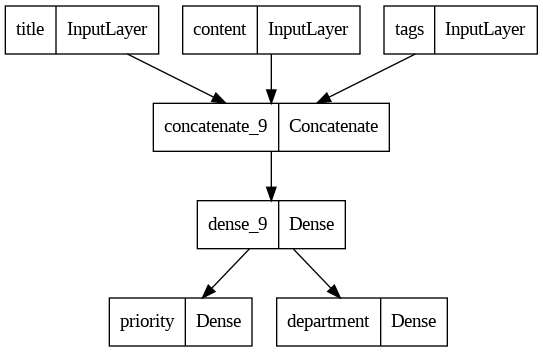

In [40]:
keras.utils.plot_model(model,"first_model.png")

带每层维度的拓扑结构

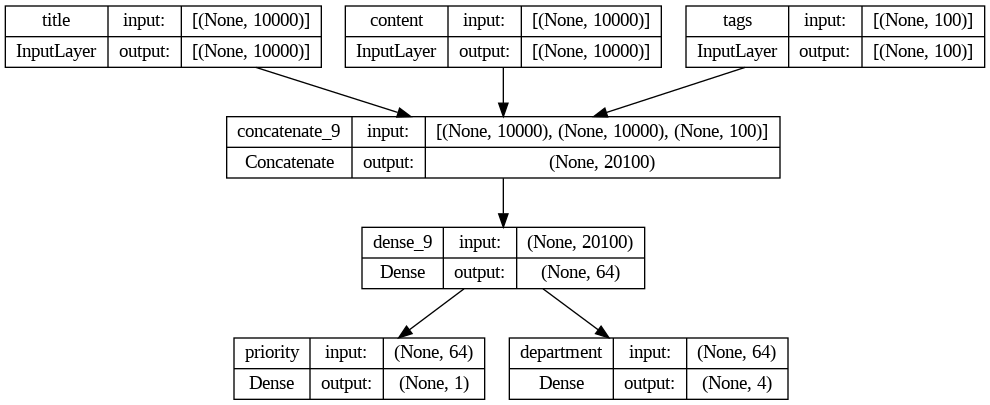

In [41]:
keras.utils.plot_model(model,"model_with_shape.png",show_shapes = True)

基于函数式API的模型训练<br>
这种模型的训练方法与序贯模型相同，都是对输入数据和输出数据组成的列表调用fit()

In [52]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
content_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
tag_data = np.random.randint(0,2,size=(num_samples,num_tags))

# 标签的生成
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples,num_department))


# 查看数据
print(title_data)
print(content_data)
print(tag_data)
print(priority_data)
print(department_data)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
[[1 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 1]]
[[1 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 1 1]
 ...
 [1 0 1 ... 0 1 1]
 [0 1 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0.45797945]
 [0.09476615]
 [0.13473283]
 ...
 [0.31092879]
 [0.67471022]
 [0.48444233]]
[[1 1 0 0]
 [1 1 1 0]
 [0 0 1 1]
 ...
 [0 1 0 1]
 [0 1 1 1]
 [0 1 1 1]]


编译模型，向模型喂数据




In [43]:
model.compile(optimizer="rmsprop",loss=["mean_squared_error","categorical_crossentropy"],metrics=["mean_absolute_error","accuracy"])
model.fit([title_data,content_data,tag_data],[priority_data,department_data],epochs=1)
model.evaluate([title_data,content_data,tag_data],[priority_data,department_data])

priority,department = model.predict([title_data,content_data,tag_data])

40/40 [==============================] - 0s 8ms/step


上述传参的过程用了完整列表，实际上可以使用字典


In [44]:
model.compile(optimizer="rmsprop",loss={'priority':'mean_squared_error','department':'categorical_crossentropy'},metrics={'priority':'mean_absolute_error','department':'accuracy'})
model.fit([title_data,content_data,tag_data],[priority_data,department_data],epochs=1)
model.evaluate([title_data,content_data,tag_data],[priority_data,department_data])

priority,department = model.predict([title_data,content_data,tag_data])

40/40 [==============================] - 0s 7ms/step


# 7.2.3 模型子类化

继承model，自编写一个model类<br>
1、完成init函数<br>
实现权重初始化<br>
2、完成call函数<br>
实现向前传播的功能

In [56]:
class myTricketModel(keras.Model):
  def __init__(self,num_department):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.feature_layer = layers.Dense(64,activation="relu",name="feature")
    self.priority_layer = layers.Dense(1,activation="sigmoid",name="priority")
    self.department_layer = layers.Dense(num_department,activation="softmax",name="department")

  # 出现错误TypeError: myTricketModel.__call__() got an unexpected keyword argument 'training'所以才增加**kwargs参数
  def __call__(self,inputs,**kwargs):
    titles = inputs['titles']
    contents = inputs['contents']
    tags = inputs['tags']
    features = self.concat_layer([titles,contents,tags])
    features = self.feature_layer(features)
    priority = self.priority_layer(features)
    department = self.department_layer(features)
    return priority,department



In [58]:
model = myTricketModel(num_department=4)
# keras.utils.plot_model(model,"myTricketModel.png") 模型只有在正在接受到数据以后才会build
inputs = {'titles':title_data,'contents':content_data,'tags':tag_data}
print(inputs)
model(inputs)
model.compile(optimizer="rmsprop",loss=["mean_squared_error","categorical_crossentropy"],metrics=["mean_absolute_error","accuracy"])
model.fit(inputs,[priority_data,department_data],epochs=1)
model.evaluate(inputs,[priority_data,department_data])

priority,department = model.predict(inputs)
print(priority,department)


{'titles': array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]]), 'contents': array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]]), 'tags': array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])}
40/40 [==============================] - 0s 8ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] [[2.6020253e-08 9.4737034e-06 9.5711869e-01 4.2871810e-02]
 [7.0863194e-08 1.1685823e-06 9.8510712e-01 1.4891563e-02]
 [2.5245408e-08 2.5566221e-06 9.6761489e-01 3.2382473e-02]
 ...
 [9.1705125e-08 4.4781959e-06 9.5583290e-01 4.4162504e-02]
 [8.8771870e-09